In [8]:
pip install scikit-learn pandas matplotlib japanize-matplotlib

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# scikit-learn内蔵のCalifornia Housingデータセットを取得
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="住宅価格（中央値）")

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"平均二乗誤差（MSE）: {mse:.2f}")
print(f"決定係数（R²）: {r2:.2f}")

平均二乗誤差（MSE）: 0.56
決定係数（R²）: 0.58


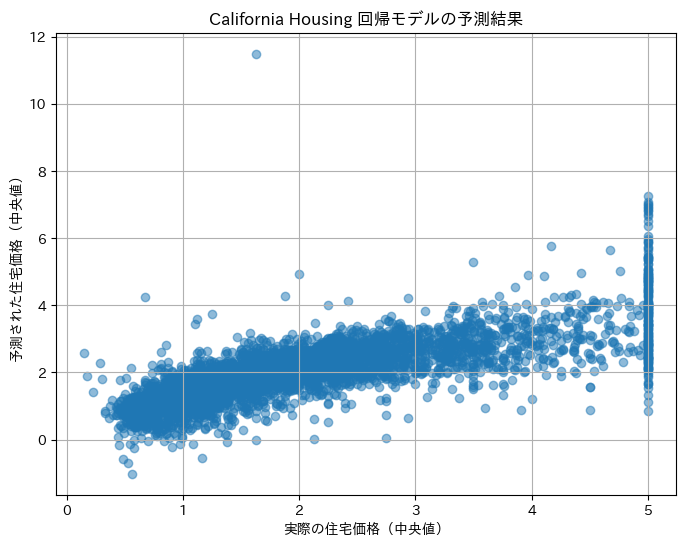

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("実際の住宅価格（中央値）")
plt.ylabel("予測された住宅価格（中央値）")
plt.title("California Housing 回帰モデルの予測結果")
plt.grid(True)
plt.show()

In [15]:
import numpy as np

# IQRによる異常値のしきい値を計算
q1 = np.percentile(y_pred, 25)
q3 = np.percentile(y_pred, 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [16]:
# 異常値でないインデックスを抽出
mask = (y_pred >= lower_bound) & (y_pred <= upper_bound)

# 異常値を除いた予測値と実測値
y_pred_clean = y_pred[mask]
y_test_clean = y_test.reset_index(drop=True)[mask]

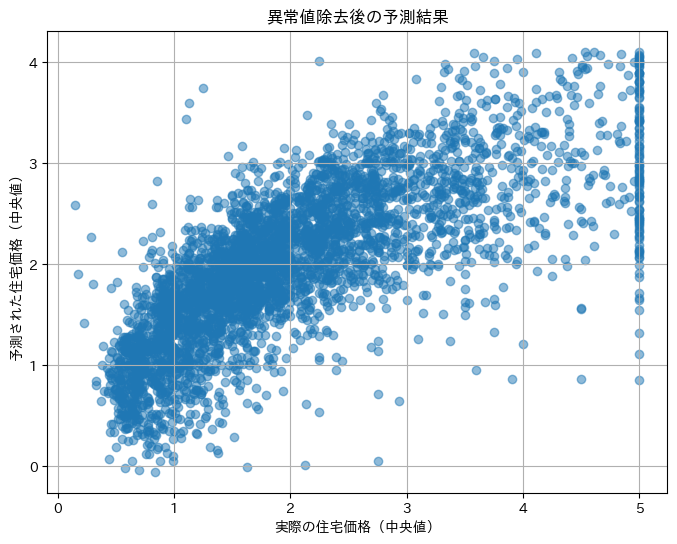

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_clean, y_pred_clean, alpha=0.5)
plt.xlabel("実際の住宅価格（中央値）")
plt.ylabel("予測された住宅価格（中央値）")
plt.title("異常値除去後の予測結果")
plt.grid(True)
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

mse_clean = mean_squared_error(y_test_clean, y_pred_clean)
r2_clean = r2_score(y_test_clean, y_pred_clean)

print(f"異常値除去後の平均二乗誤差: {mse_clean:.2f}")
print(f"異常値除去後の決定係数 R²: {r2_clean:.2f}")

異常値除去後の平均二乗誤差: 0.52
異常値除去後の決定係数 R²: 0.56


In [5]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 49.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=f5664f3bfa12e1246a68c922dbf7e899e1a1b44bcdade70d4aebac07f9be8e04
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


In [6]:
import japanize_matplotlib

平均二乗誤差（MSE）: 0.56
平均絶対誤差（MAE）: 0.53
平均二乗平方根誤差（RMSE）: 0.75
決定係数（R²）: 0.58


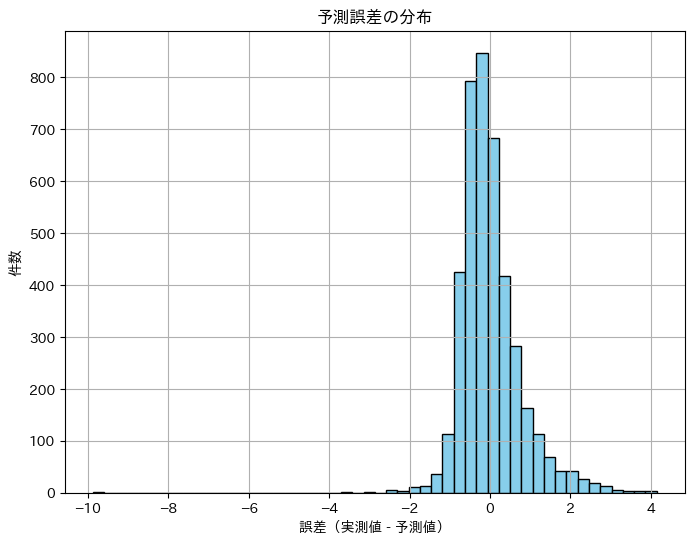

In [7]:
# 必要なライブラリのインポート
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語表示対応

# データの読み込み
housing = fetch_california_housing()
X = housing.data
y = housing.target

# データの分割（80%訓練、20%テスト）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 線形回帰モデルの作成と学習
model = LinearRegression()
model.fit(X_train, y_train)

# テストデータで予測
y_pred = model.predict(X_test)

# 評価指標の計算
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 結果の表示（日本語）
print(f"平均二乗誤差（MSE）: {mse:.2f}")
print(f"平均絶対誤差（MAE）: {mae:.2f}")
print(f"平均二乗平方根誤差（RMSE）: {rmse:.2f}")
print(f"決定係数（R²）: {r2:.2f}")

# 誤差分布の可視化
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, color="skyblue", edgecolor="black")
plt.title("予測誤差の分布")
plt.xlabel("誤差（実測値 - 予測値）")
plt.ylabel("件数")
plt.grid(True)
plt.show()

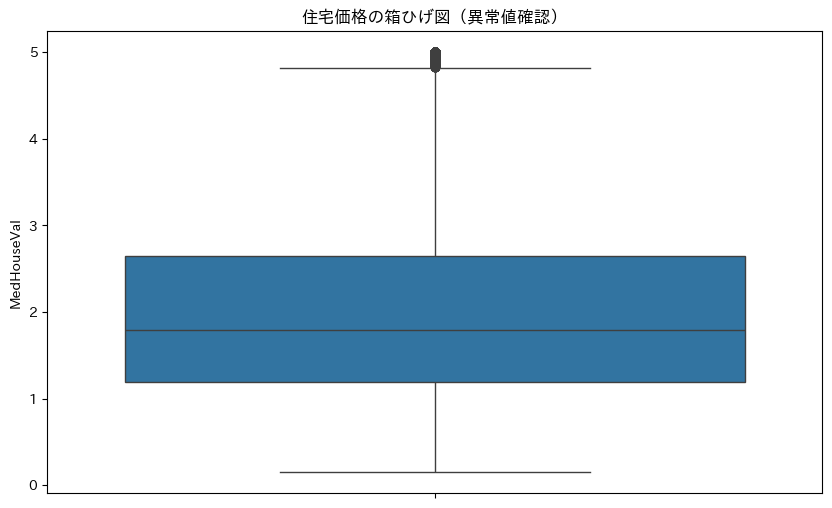

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# データフレーム化
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["MedHouseVal"] = housing.target  # 目的変数を追加

# 箱ひげ図で異常値を確認
plt.figure(figsize=(10, 6))
sns.boxplot(data=df["MedHouseVal"])
plt.title("住宅価格の箱ひげ図（異常値確認）")
plt.show()

In [9]:
# 四分位数の計算
Q1 = df["MedHouseVal"].quantile(0.25)
Q3 = df["MedHouseVal"].quantile(0.75)
IQR = Q3 - Q1

# 異常値のしきい値
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 異常値を除外したデータ
df_clean = df[(df["MedHouseVal"] >= lower_bound) & (df["MedHouseVal"] <= upper_bound)]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 特徴量と目的変数に分割
X = df_clean.drop("MedHouseVal", axis=1)
y = df_clean["MedHouseVal"]

# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデル学習
model = LinearRegression()
model.fit(X_train, y_train)

# 予測と評価
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"異常値除去後のRMSE: {rmse:.2f}")
print(f"異常値除去後のR²: {r2:.2f}")

異常値除去後のRMSE: 0.61
異常値除去後のR²: 0.60


In [12]:
print(df_clean.columns.tolist())

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


In [13]:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'MedHouseVal']

In [14]:
df_clean["RoomsPerOccupant"] = df_clean["AveRooms"] / df_clean["AveOccup"]

/tmp/ipython-input-267541248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["RoomsPerOccupant"] = df_clean["AveRooms"] / df_clean["AveOccup"]


In [15]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7]
}

grid = GridSearchCV(XGBRegressor(), param_grid, cv=3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [100, 200]})

In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print("平均RMSE:", np.sqrt(-scores.mean()))

平均RMSE: 0.5620478775395019


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 予測結果が y_pred、正解ラベルが y_test の場合
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 結果の表示
print("🔁 モデル再評価結果")
print(f"平均二乗誤差（MSE）: {mse:.2f}")
print(f"平均絶対誤差（MAE）: {mae:.2f}")
print(f"平均二乗平方根誤差（RMSE）: {rmse:.2f}")
print(f"決定係数（R²）: {r2:.2f}")

🔁 モデル再評価結果
平均二乗誤差（MSE）: 0.37
平均絶対誤差（MAE）: 0.46
平均二乗平方根誤差（RMSE）: 0.61
決定係数（R²）: 0.60


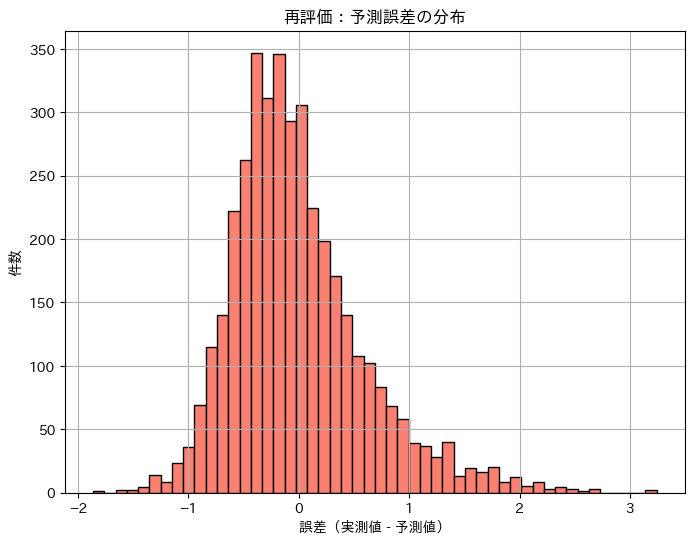

In [20]:
import matplotlib.pyplot as plt

errors = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, color="salmon", edgecolor="black")
plt.title("再評価：予測誤差の分布")
plt.xlabel("誤差（実測値 - 予測値）")
plt.ylabel("件数")
plt.grid(True)
plt.show()